In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)

In [236]:
df=pd.read_csv('winequality-red.csv')

In [237]:
df=pd.DataFrame(df)

In [238]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [239]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [240]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [241]:
# Converting Quality rating into two catagories according to the problem statement

In [242]:
df['quality'] = np.where(df['quality']<6.5,('good'),('bad')) # converted into good and bad based on quality

In [243]:
df.quality.value_counts()

good    1382
bad      217
Name: quality, dtype: int64

In [244]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,good


# EDA

In [245]:
df=df.rename(columns={'fixed acidity':'fixed_acidity'})

In [246]:
df

,fixed_acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,good


In [247]:
df.fixed_acidity.value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed_acidity, Length: 96, dtype: int64

In [248]:
df.fixed_acidity.describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

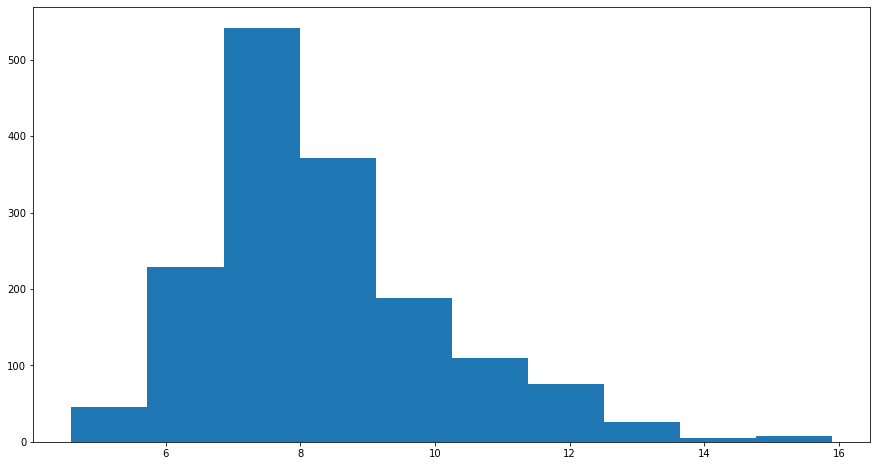

In [249]:
plt.hist(df.fixed_acidity)

<AxesSubplot:xlabel='fixed_acidity', ylabel='count'>

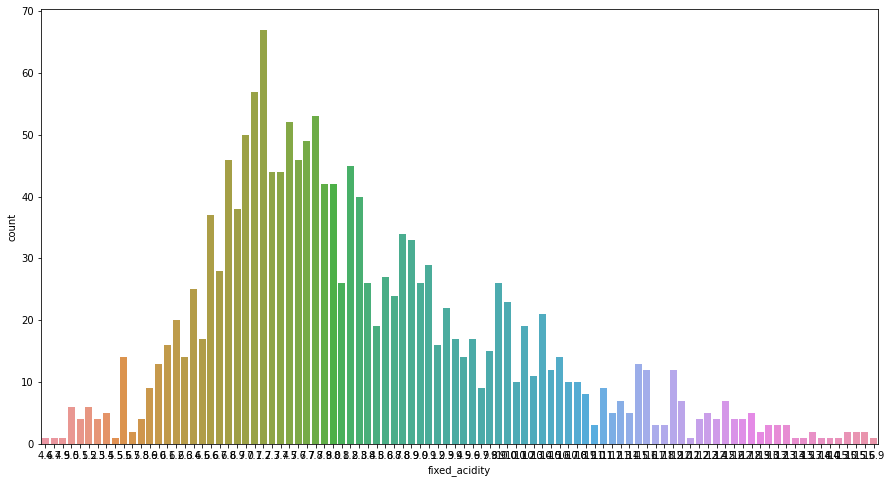

In [250]:
sns.countplot(df.fixed_acidity)

<AxesSubplot:xlabel='fixed_acidity', ylabel='Density'>

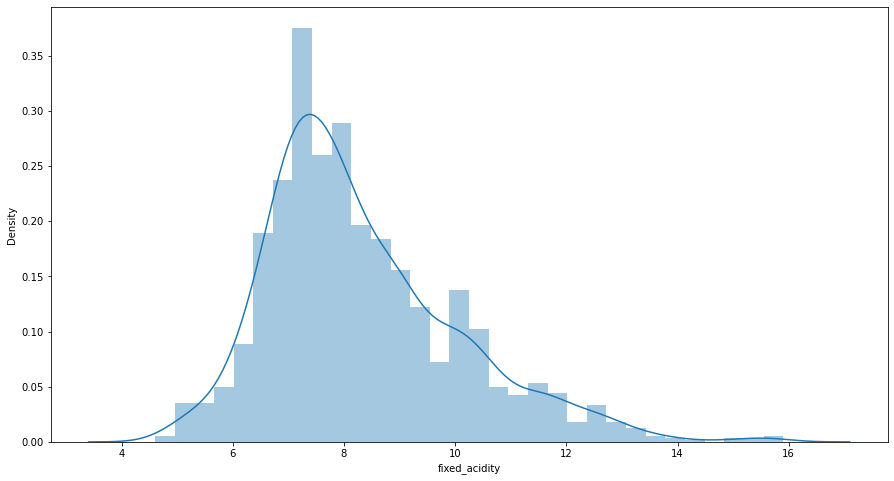

In [251]:
sns.distplot(df.fixed_acidity)

<AxesSubplot:xlabel='fixed_acidity'>

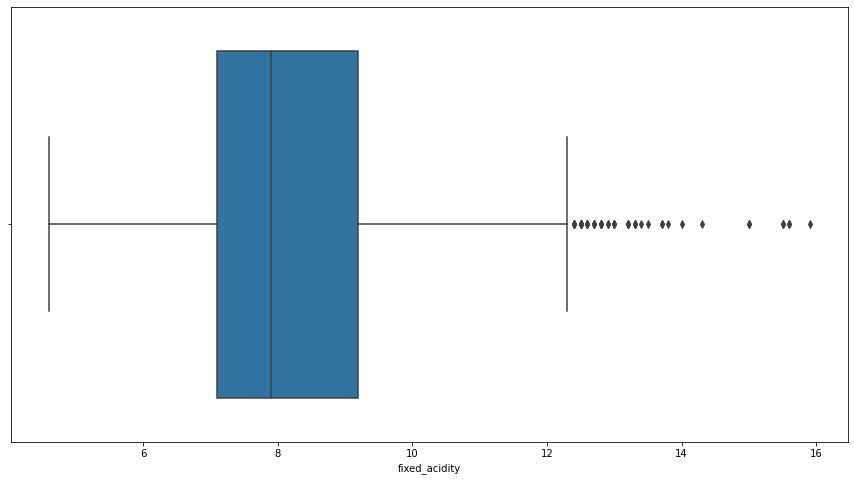

In [252]:
sns.boxplot(df.fixed_acidity)

In [253]:
IQR=df.fixed_acidity.quantile(0.75)-df.fixed_acidity.quantile(0.25)
IQR

2.0999999999999996

In [254]:
upper_limit=df.fixed_acidity.quantile(0.75)+(1.5*IQR)
upper_limit

12.349999999999998

In [255]:
len(df.fixed_acidity[df.fixed_acidity>12.349999999999998])

49

In [256]:
df=df[df['fixed_acidity']<=13]

In [257]:
df

,fixed_acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,good


In [258]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m1=ols('fixed_acidity ~ quality',data=df).fit()
an1=sm.stats.anova_lm(m1)
print(an1)

t1=pairwise_tukeyhsd(df.fixed_acidity,df.quality,alpha=0.05)
print(t1)

              df       sum_sq    mean_sq          F    PR(>F)
quality      1.0    59.469658  59.469658  23.067259  0.000002
Residual  1577.0  4065.660779   2.578098        NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   bad   good  -0.5681 0.001 -0.8001 -0.3361   True
---------------------------------------------------


In [259]:
df.groupby('quality')['fixed_acidity'].mean()

quality
bad     8.736620
good    8.168521
Name: fixed_acidity, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

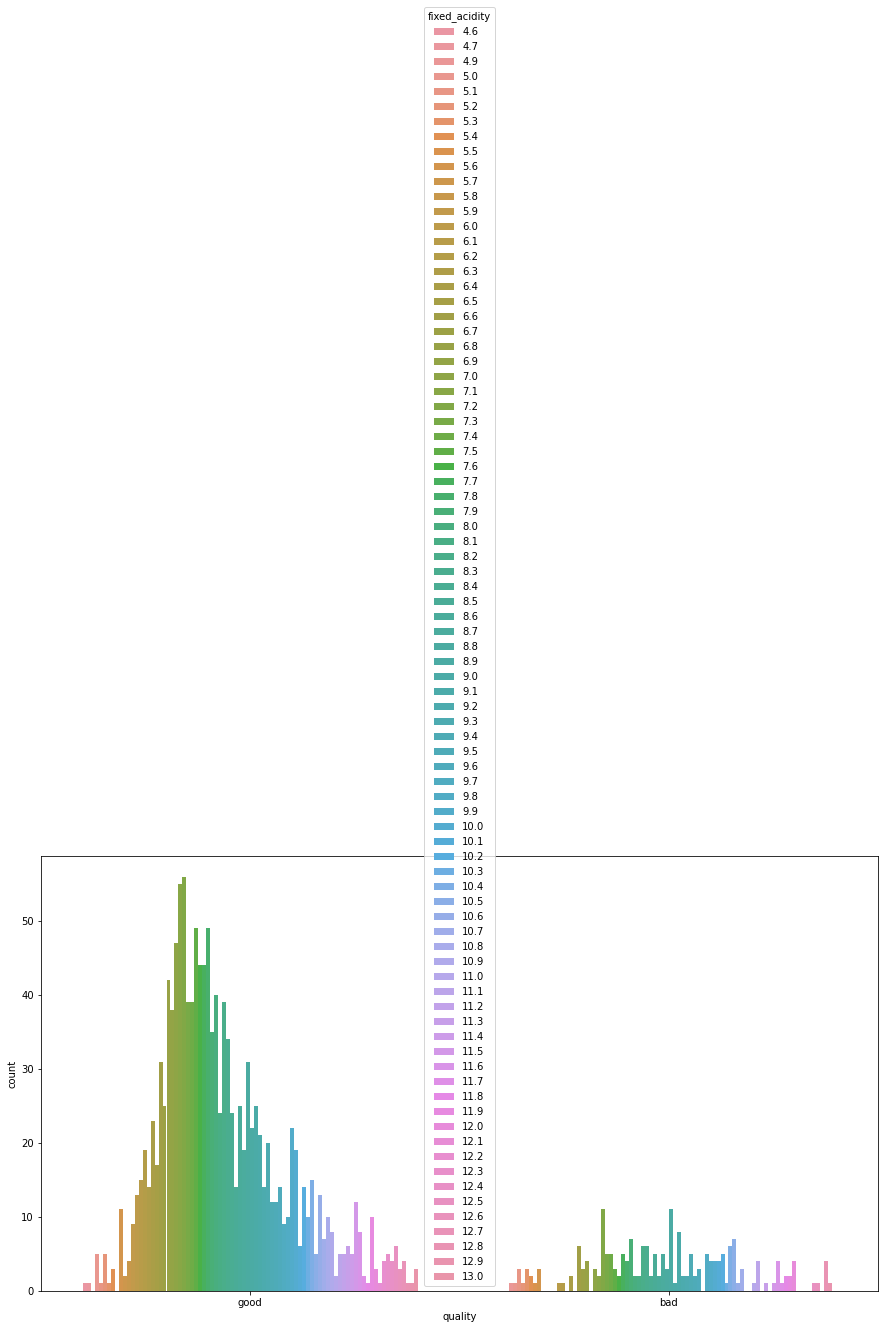

In [260]:
sns.countplot(x='quality',hue='fixed_acidity',data=df)

In [261]:
df.groupby('fixed_acidity')['alcohol'].mean()

fixed_acidity
4.6     13.100000
4.7     12.900000
4.9     14.000000
5.0     12.683333
5.1     13.050000
          ...    
12.6    10.300000
12.7    10.500000
12.8    10.400000
12.9    11.450000
13.0    12.000000
Name: alcohol, Length: 84, dtype: float64

In [262]:
df.head()

,fixed_acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [263]:
df=df.rename(columns={'volatile acidity':'volatile_acidity'})

In [264]:
df.head()

,fixed_acidity,volatile_acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [265]:
df.volatile_acidity.value_counts()

0.600    47
0.500    46
0.430    42
0.590    39
0.580    38
         ..
1.035     1
1.580     1
0.950     1
1.070     1
0.805     1
Name: volatile_acidity, Length: 143, dtype: int64

(array([ 71., 398., 416., 471., 148.,  51.,  18.,   3.,   2.,   1.]),
 array([0.12 , 0.266, 0.412, 0.558, 0.704, 0.85 , 0.996, 1.142, 1.288,
        1.434, 1.58 ]),
 <BarContainer object of 10 artists>)

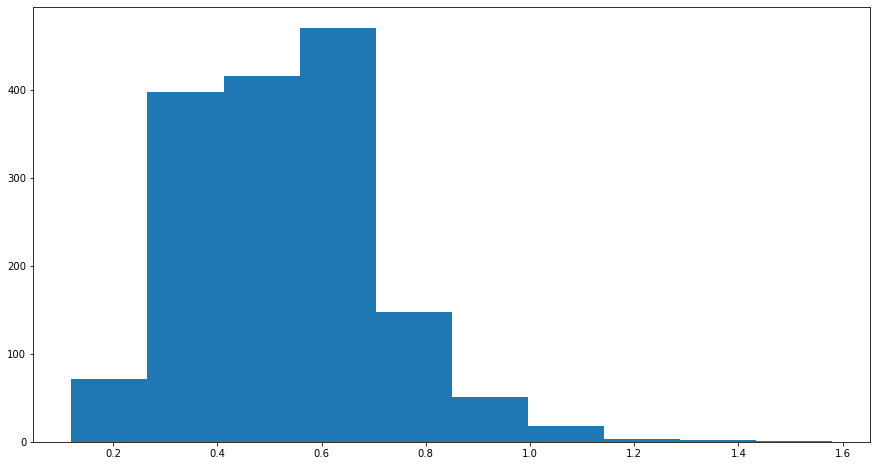

In [266]:
plt.hist(df.volatile_acidity)

<AxesSubplot:xlabel='volatile_acidity', ylabel='count'>

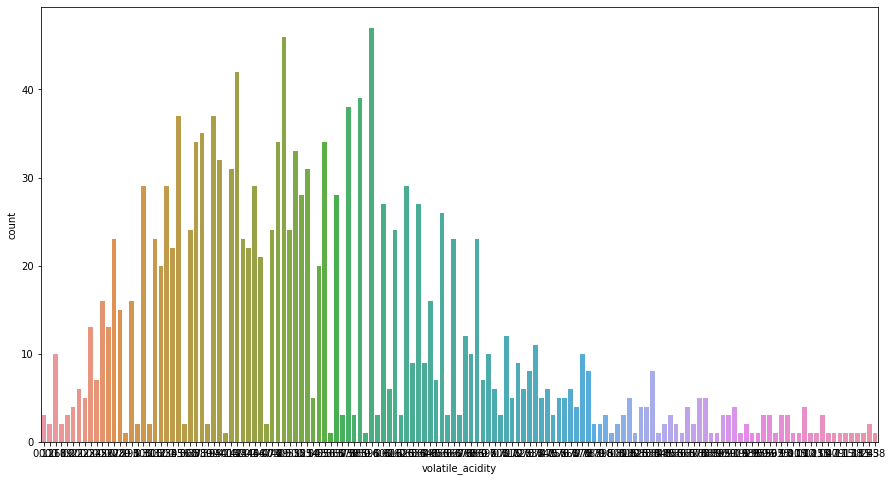

In [267]:
sns.countplot(df.volatile_acidity)

<AxesSubplot:xlabel='volatile_acidity', ylabel='Density'>

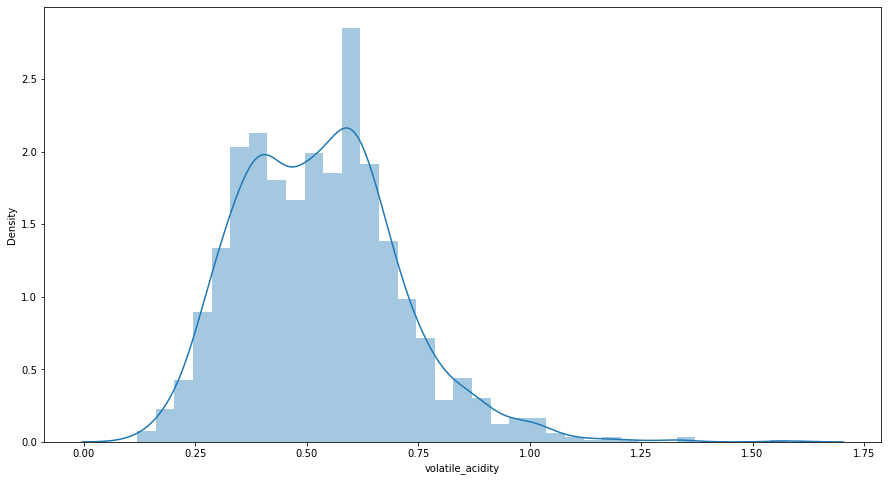

In [268]:
sns.distplot(df.volatile_acidity)

<AxesSubplot:xlabel='volatile_acidity'>

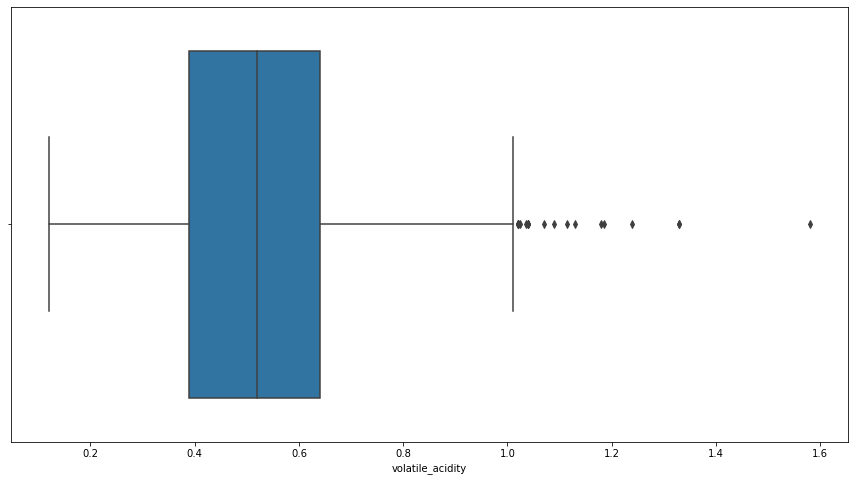

In [269]:
sns.boxplot(df.volatile_acidity)

In [270]:
IQR=df.volatile_acidity.quantile(0.75)-df.volatile_acidity.quantile(0.25)
IQR

0.25

In [271]:
upper_limit=df.volatile_acidity.quantile(0.75)+(1.5*IQR)
upper_limit

1.0150000000000001

In [272]:
len(df.volatile_acidity[df.volatile_acidity>1.0150000000000001])

19

In [273]:
df=df[df['volatile_acidity']<=19]

In [274]:
df.groupby('quality')['volatile_acidity'].mean()

quality
bad     0.406596
good    0.548155
Name: volatile_acidity, dtype: float64

In [275]:
df.groupby('alcohol')['volatile_acidity'].mean()

alcohol
8.400000     0.610000
8.500000     0.380000
8.700000     0.330000
8.800000     0.500000
9.000000     0.602037
               ...   
13.400000    0.486667
13.500000    0.290000
13.566667    0.470000
13.600000    0.412500
14.000000    0.407143
Name: volatile_acidity, Length: 64, dtype: float64

In [276]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m2=ols('volatile_acidity ~ quality',data=df).fit()
an12=sm.stats.anova_lm(m2)
print(an12)

t12=pairwise_tukeyhsd(df.volatile_acidity,df.quality,alpha=0.05)
print(t12)

              df     sum_sq   mean_sq           F        PR(>F)
quality      1.0   3.692520  3.692520  124.007944  8.840836e-28
Residual  1577.0  46.957508  0.029776         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   bad   good   0.1416 0.001 0.1166 0.1665   True
-------------------------------------------------


In [277]:
df.head()

,fixed_acidity,volatile_acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [278]:
df=df.rename(columns={'citric acid':'citric_acid'})

In [279]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [280]:
df.citric_acid.value_counts()

0.00    132
0.49     65
0.24     51
0.02     50
0.26     38
       ... 
0.67      1
0.71      1
0.78      1
0.72      1
1.00      1
Name: citric_acid, Length: 77, dtype: int64

In [281]:
df.citric_acid.describe()

count    1579.000000
mean        0.266802
std         0.192057
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         1.000000
Name: citric_acid, dtype: float64

(array([403., 203., 316., 205., 257., 127.,  56.,  11.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

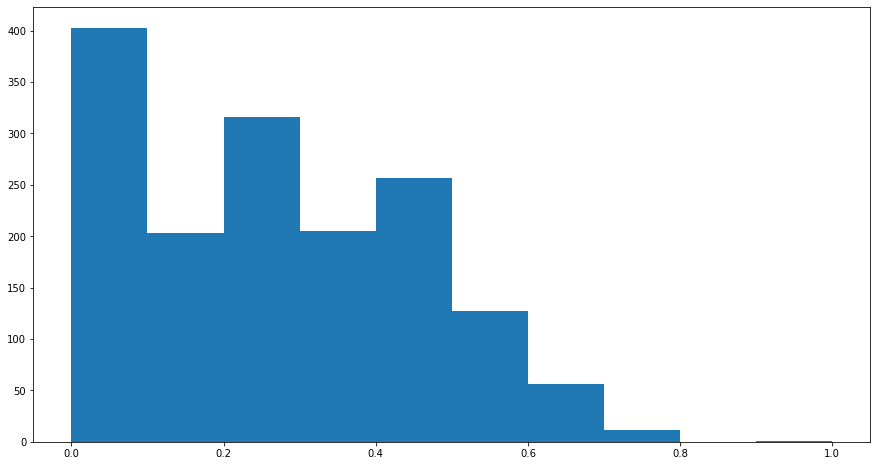

In [282]:
plt.hist(df.citric_acid)

<AxesSubplot:xlabel='citric_acid', ylabel='Density'>

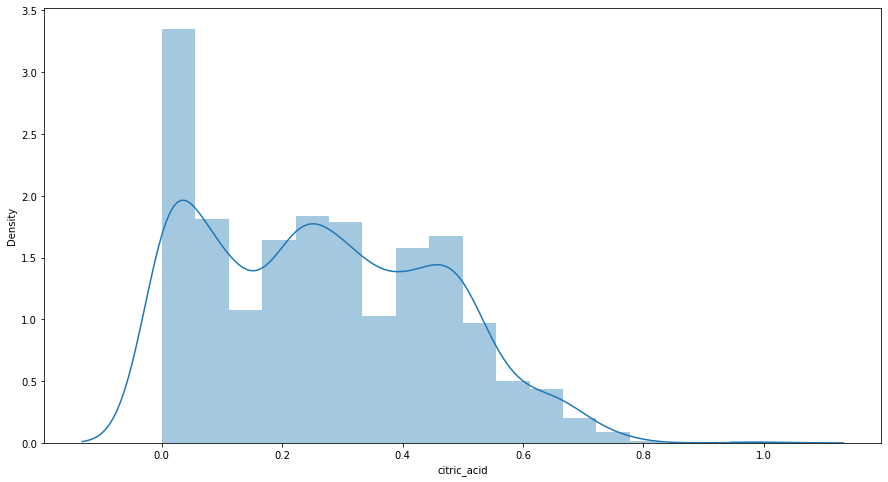

In [283]:
sns.distplot(df.citric_acid)

<AxesSubplot:xlabel='citric_acid'>

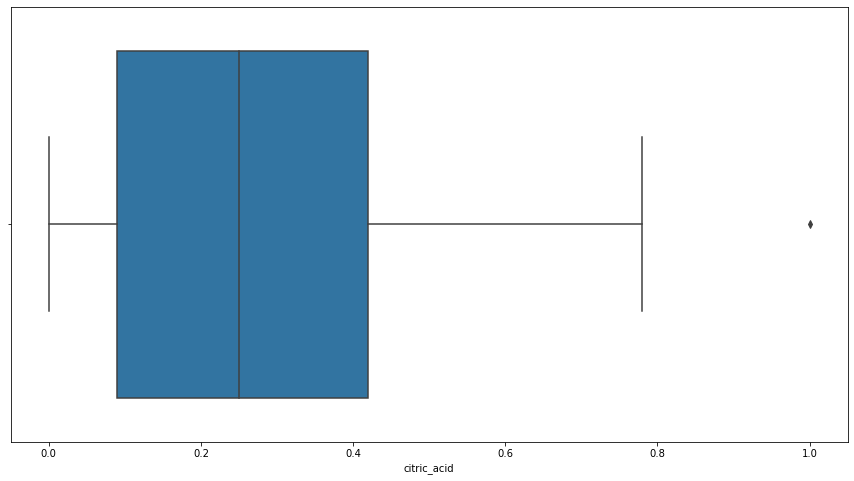

In [284]:
sns.boxplot(df.citric_acid)

In [285]:
df=df[df['citric_acid']<=0.8]

In [286]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m3=ols('citric_acid ~ quality',data=df).fit()
an3=sm.stats.anova_lm(m3)
print(an3)

t3=pairwise_tukeyhsd(df.citric_acid,df.quality,alpha=0.05)
print(t3)

              df     sum_sq   mean_sq          F        PR(>F)
quality      1.0   2.767260  2.767260  79.437893  1.343303e-18
Residual  1576.0  54.900769  0.034836        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   bad   good  -0.1226 0.001 -0.1495 -0.0956   True
---------------------------------------------------


<AxesSubplot:xlabel='citric_acid', ylabel='count'>

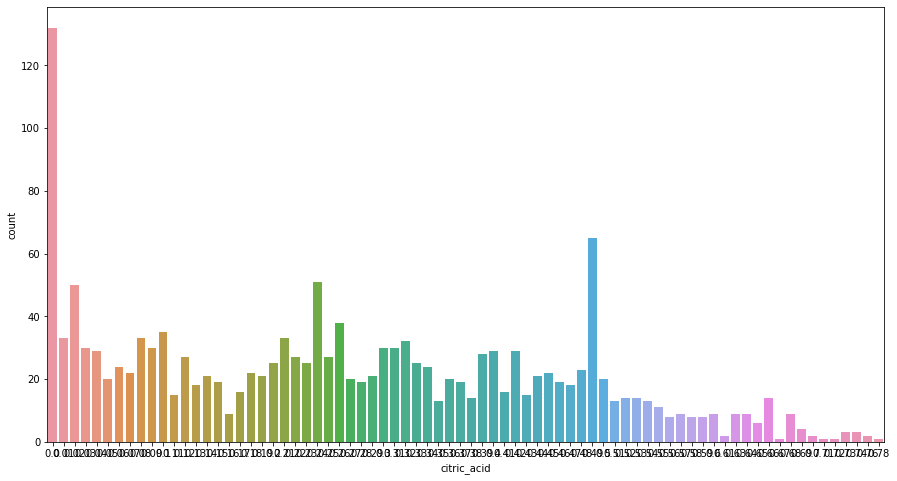

In [287]:
sns.countplot(df.citric_acid)

In [288]:
df.groupby('quality')['citric_acid'].mean()

quality
bad     0.372347
good    0.249795
Name: citric_acid, dtype: float64

In [289]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [290]:
df=df.rename(columns={'residual sugar':'residual_sugar'})

In [291]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [292]:
df.residual_sugar.value_counts()

2.00     156
1.80     128
2.10     128
2.20     127
1.90     116
        ... 
12.90      1
10.70      1
7.30       1
8.60       1
2.55       1
Name: residual_sugar, Length: 90, dtype: int64

(array([988., 453.,  63.,  45.,  10.,   8.,   3.,   0.,   5.,   3.]),
 array([ 0.9 ,  2.36,  3.82,  5.28,  6.74,  8.2 ,  9.66, 11.12, 12.58,
        14.04, 15.5 ]),
 <BarContainer object of 10 artists>)

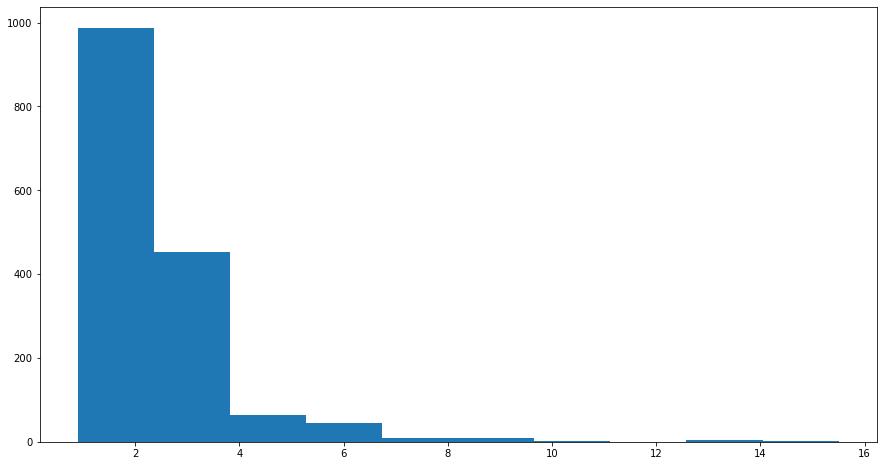

In [293]:
plt.hist(df.residual_sugar)

<AxesSubplot:xlabel='residual_sugar', ylabel='Density'>

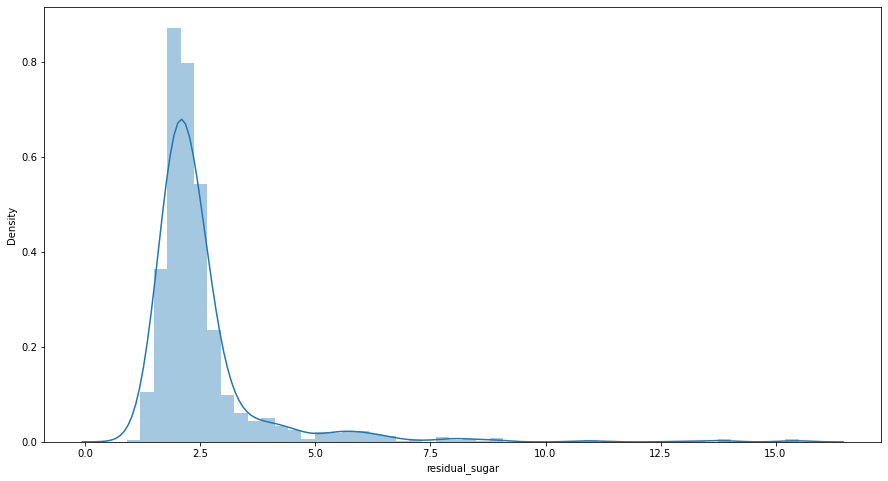

In [294]:
sns.distplot(df.residual_sugar)

<AxesSubplot:xlabel='residual_sugar'>

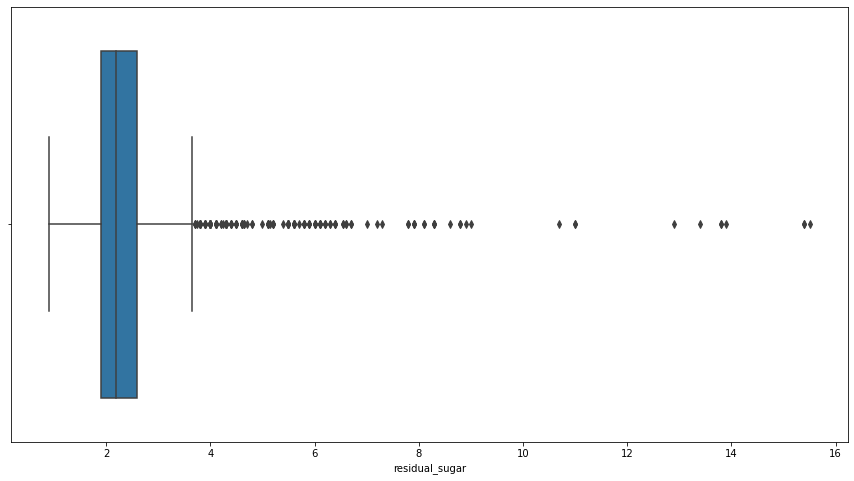

In [295]:
sns.boxplot(df.residual_sugar)

In [296]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m4=ols('residual_sugar ~ quality',data=df).fit()
an4=sm.stats.anova_lm(m4)
print(an4)

t4=pairwise_tukeyhsd(df.residual_sugar,df.quality,alpha=0.05)
print(t4)

              df       sum_sq   mean_sq         F    PR(>F)
quality      1.0     7.907757  7.907757  3.988678  0.045979
Residual  1576.0  3124.500045  1.982551       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   bad   good  -0.2072 0.046 -0.4106 -0.0037   True
---------------------------------------------------


In [297]:
IQR=df.residual_sugar.quantile(0.75)-df.residual_sugar.quantile(0.25)
IQR

0.7000000000000002

In [298]:
upper_limit=df.residual_sugar.quantile(0.75)+(1.5*IQR)
upper_limit

3.6500000000000004

In [299]:
len(df.residual_sugar[df.residual_sugar>3.6500000000000004])

148

In [300]:
df=df[df['residual_sugar']<=4]

In [301]:
df.groupby('quality')['residual_sugar'].mean()

quality
bad     2.247312
good    2.203263
Name: residual_sugar, dtype: float64

In [302]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [303]:
df.chlorides.value_counts()

0.080    62
0.076    50
0.078    50
0.074    48
0.077    47
         ..
0.137     1
0.267     1
0.043     1
0.186     1
0.125     1
Name: chlorides, Length: 147, dtype: int64

In [304]:
df.chlorides.describe()

count    1458.000000
mean        0.086967
std         0.046366
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

(array([418., 969.,  34.,  13.,   3.,   8.,  10.,   2.,   0.,   1.]),
 array([0.012 , 0.0719, 0.1318, 0.1917, 0.2516, 0.3115, 0.3714, 0.4313,
        0.4912, 0.5511, 0.611 ]),
 <BarContainer object of 10 artists>)

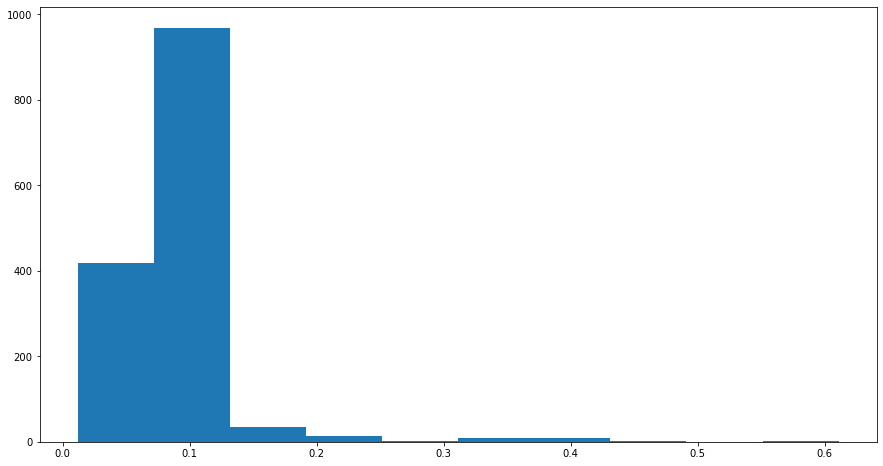

In [305]:
plt.hist(df.chlorides)

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

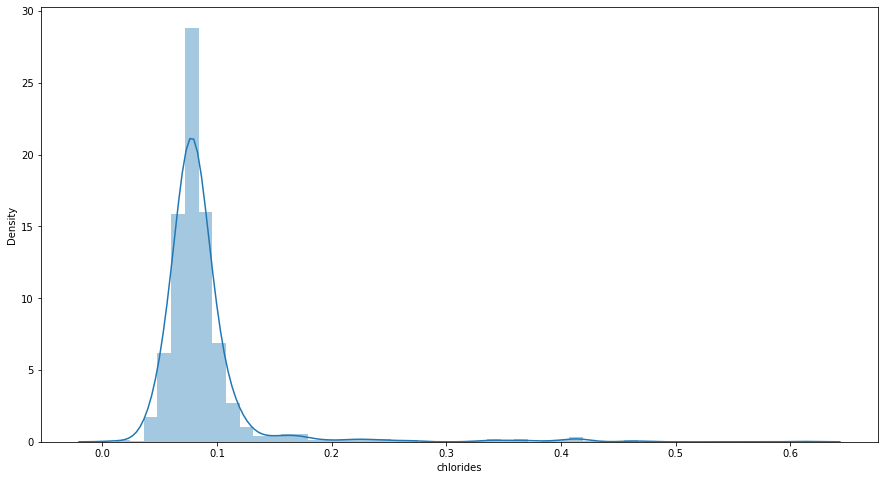

In [306]:
sns.distplot(df.chlorides)

<AxesSubplot:xlabel='chlorides', ylabel='count'>

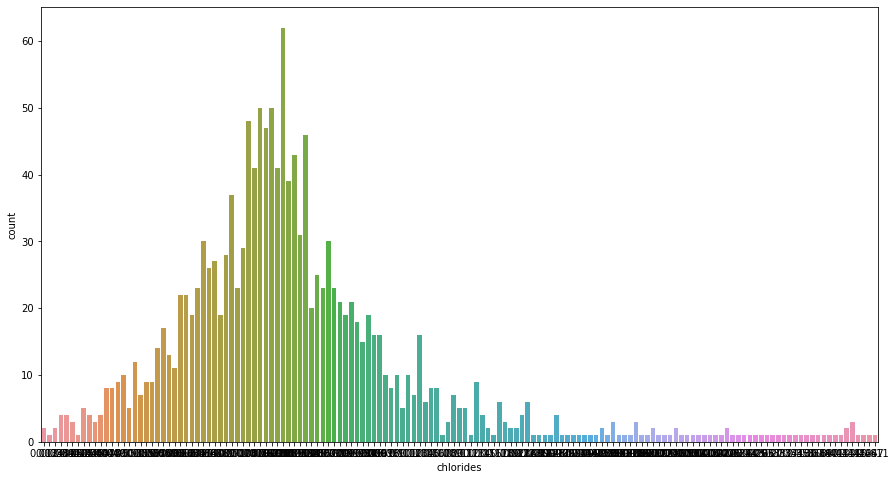

In [307]:
sns.countplot(df.chlorides)

<AxesSubplot:xlabel='chlorides'>

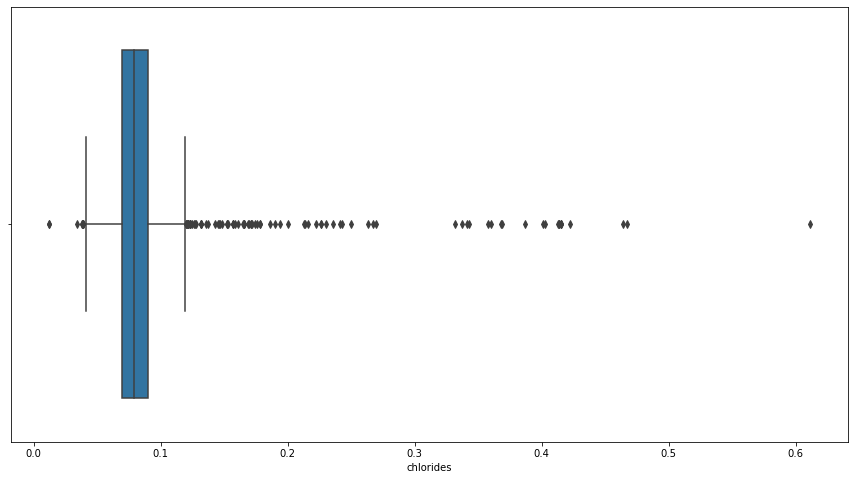

In [308]:
sns.boxplot(df.chlorides)

In [309]:
IQR=df.chlorides.quantile(0.75)-df.chlorides.quantile(0.25)
IQR

0.01999999999999999

In [310]:
upper_limit=df.chlorides.quantile(0.75)+(1.5*IQR)
upper_limit

0.11999999999999998

In [311]:
len(df.chlorides[df.chlorides>0.11999999999999998])

89

In [312]:
df=df[df['chlorides']<=0.2]

In [313]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m5=ols('chlorides ~ quality',data=df).fit()
an5=sm.stats.anova_lm(m5)
print(an5)

t5=pairwise_tukeyhsd(df.chlorides,df.quality,alpha=0.05)
print(t5)

              df    sum_sq   mean_sq          F        PR(>F)
quality      1.0  0.012571  0.012571  30.673022  3.633186e-08
Residual  1421.0  0.582369  0.000410        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
   bad   good   0.0089 0.001 0.0057 0.012   True
------------------------------------------------


In [314]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [315]:
df=df.rename(columns={'free sulfur dioxide':'free_sulfur_dioxide'})

In [316]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [317]:
df.free_sulfur_dioxide.value_counts()

6.0     116
5.0      85
15.0     74
10.0     67
12.0     66
7.0      66
9.0      58
17.0     54
13.0     54
16.0     54
11.0     52
8.0      52
14.0     49
18.0     43
3.0      42
4.0      39
21.0     38
19.0     34
24.0     33
20.0     28
26.0     28
27.0     26
23.0     26
25.0     23
32.0     21
28.0     20
22.0     20
29.0     19
31.0     19
34.0     17
35.0     14
30.0     13
36.0     10
33.0     10
38.0      7
41.0      7
40.0      5
39.0      5
45.0      3
37.0      3
43.0      3
1.0       3
42.0      3
51.0      2
52.0      2
48.0      2
46.0      1
54.0      1
47.0      1
2.0       1
53.0      1
57.0      1
50.0      1
40.5      1
Name: free_sulfur_dioxide, dtype: int64

In [318]:
df.free_sulfur_dioxide.describe()

count    1423.000000
mean       15.708714
std         9.869989
min         1.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        57.000000
Name: free_sulfur_dioxide, dtype: float64

(array([286., 361., 285., 189., 130.,  99.,  44.,  17.,   7.,   5.]),
 array([ 1. ,  6.6, 12.2, 17.8, 23.4, 29. , 34.6, 40.2, 45.8, 51.4, 57. ]),
 <BarContainer object of 10 artists>)

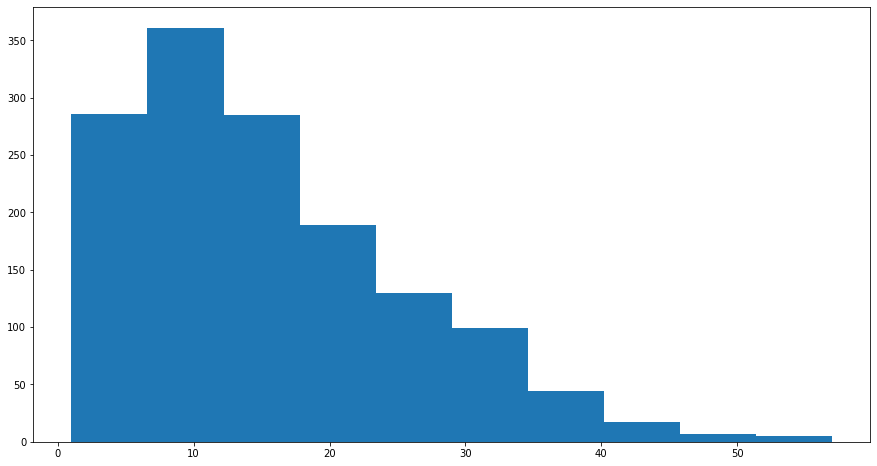

In [319]:
plt.hist(df.free_sulfur_dioxide)

<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='count'>

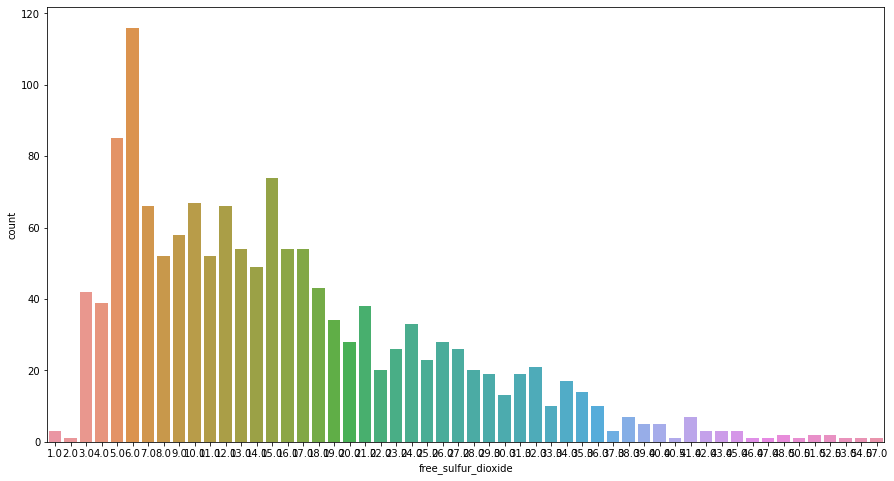

In [320]:
sns.countplot(df.free_sulfur_dioxide)

<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='Density'>

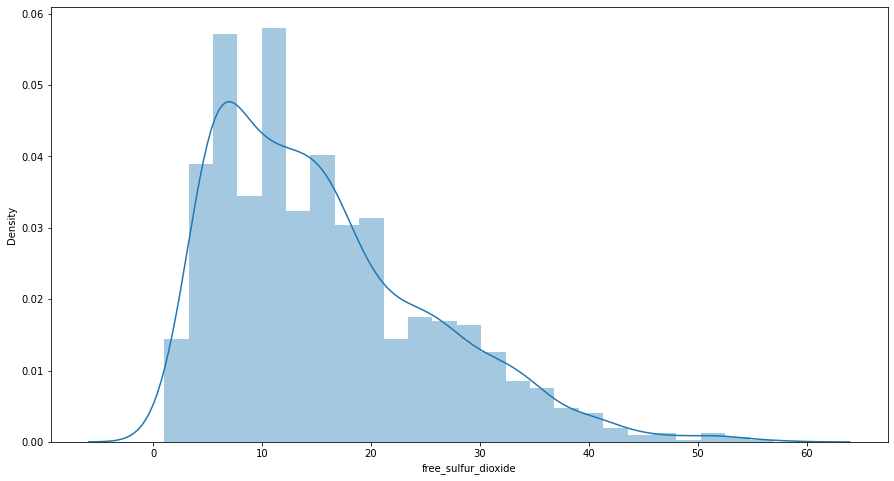

In [321]:
sns.distplot(df.free_sulfur_dioxide)

<AxesSubplot:xlabel='free_sulfur_dioxide'>

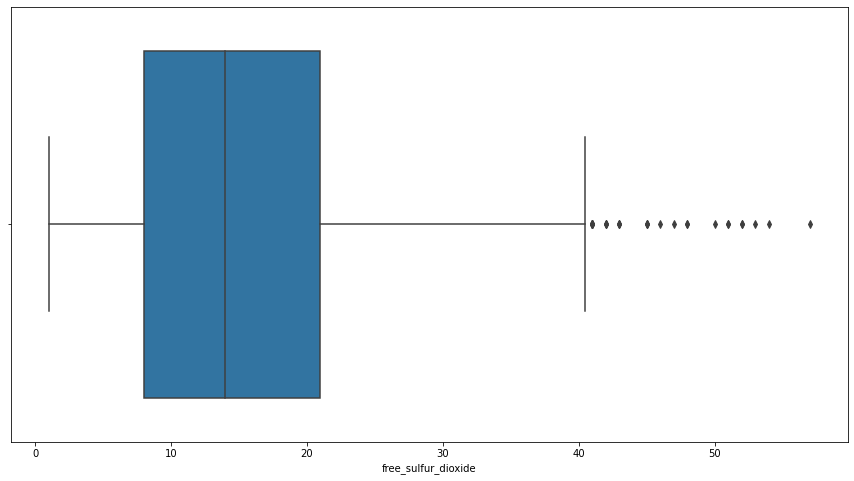

In [322]:
sns.boxplot(df.free_sulfur_dioxide)

In [323]:
IQR=df.free_sulfur_dioxide.quantile(0.75)-df.free_sulfur_dioxide.quantile(0.25)
IQR

13.0

In [324]:
upper_limit=df.free_sulfur_dioxide.quantile(0.75)+(1.5*IQR)
upper_limit

40.5

In [325]:
len(df.free_sulfur_dioxide[df.free_sulfur_dioxide>40.5])

28

In [326]:
df=df[df['free_sulfur_dioxide']<=41]

In [327]:
df.groupby('quality')['free_sulfur_dioxide'].mean()

quality
bad     13.335196
good    15.508994
Name: free_sulfur_dioxide, dtype: float64

In [328]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m5=ols('free_sulfur_dioxide ~ quality',data=df).fit()
an5=sm.stats.anova_lm(m5)
print(an5)

t5=pairwise_tukeyhsd(df.free_sulfur_dioxide,df.quality,alpha=0.05)
print(t5)

              df         sum_sq     mean_sq         F    PR(>F)
quality      1.0     737.853501  737.853501  8.924957  0.002862
Residual  1400.0  115742.289331   82.673064       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   bad   good   2.1738 0.0029 0.7464 3.6012   True
--------------------------------------------------


In [329]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [330]:
df=df.rename(columns={'total sulfur dioxide':'total_sulfur_dioxide'})

In [331]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [332]:
df.total_sulfur_dioxide.value_counts()

28.0     43
31.0     32
24.0     31
15.0     30
23.0     30
         ..
149.0     1
153.0     1
83.0      1
139.0     1
151.0     1
Name: total_sulfur_dioxide, Length: 136, dtype: int64

In [333]:
df.total_sulfur_dioxide.describe()

count    1402.000000
mean       44.758203
std        30.532030
min         6.000000
25%        22.000000
50%        37.000000
75%        59.000000
max       165.000000
Name: total_sulfur_dioxide, dtype: float64

(array([336., 384., 267., 163.,  79.,  81.,  41.,  26.,  20.,   5.]),
 array([  6. ,  21.9,  37.8,  53.7,  69.6,  85.5, 101.4, 117.3, 133.2,
        149.1, 165. ]),
 <BarContainer object of 10 artists>)

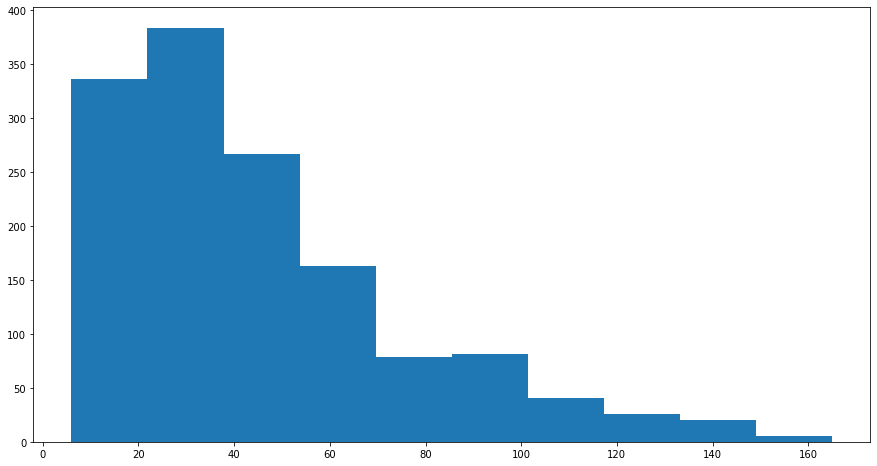

In [334]:
plt.hist(df.total_sulfur_dioxide)

<AxesSubplot:xlabel='total_sulfur_dioxide', ylabel='Density'>

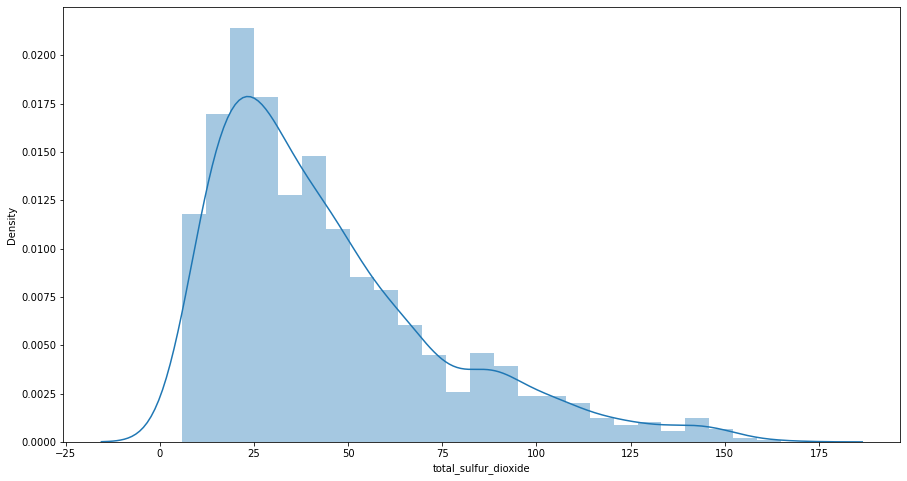

In [335]:
sns.distplot(df.total_sulfur_dioxide)

<AxesSubplot:xlabel='total_sulfur_dioxide', ylabel='count'>

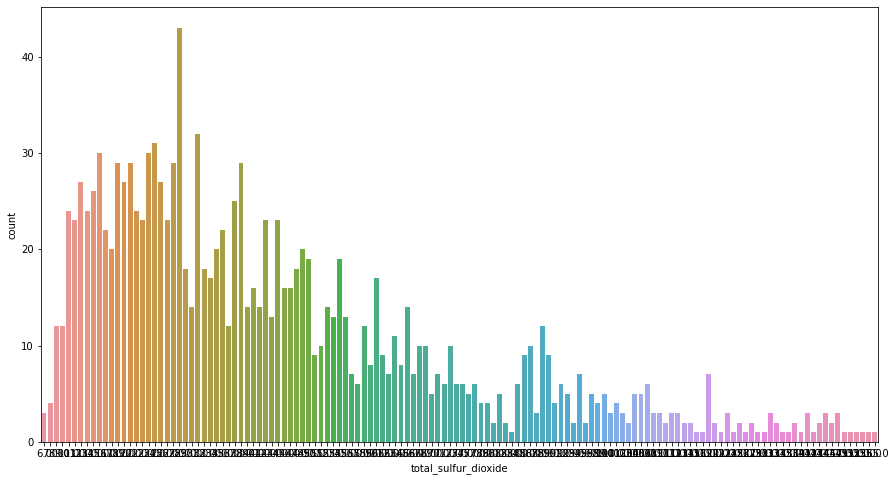

In [336]:
sns.countplot(df.total_sulfur_dioxide)

<AxesSubplot:xlabel='total_sulfur_dioxide'>

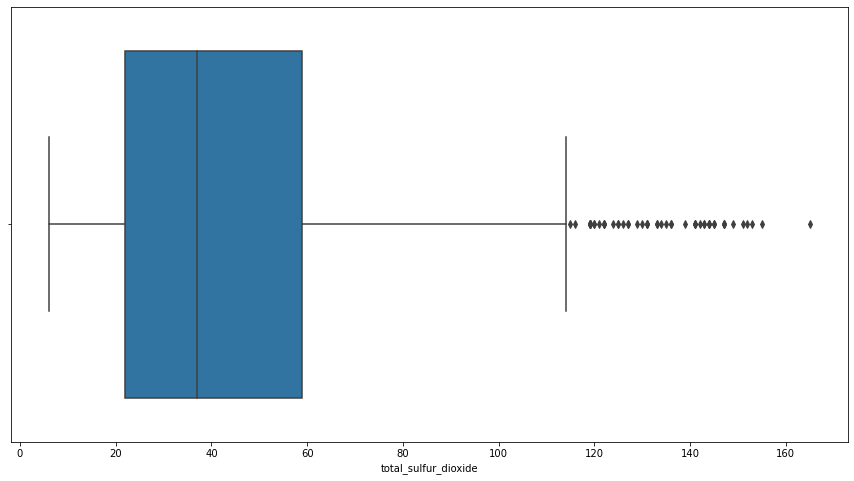

In [337]:
sns.boxplot(df.total_sulfur_dioxide)

In [338]:
IQR=df.total_sulfur_dioxide.quantile(0.75)-df.total_sulfur_dioxide.quantile(0.25)
IQR

37.0

In [339]:
upper_limit=df.total_sulfur_dioxide.quantile(0.75)+(1.5*IQR)
upper_limit

114.5

In [340]:
len(df.total_sulfur_dioxide[df.total_sulfur_dioxide>114.5])

53

In [341]:
df=df[df['total_sulfur_dioxide']<=118]

In [342]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m5=ols('total_sulfur_dioxide ~ quality',data=df).fit()
an5=sm.stats.anova_lm(m5)
print(an5)

t5=pairwise_tukeyhsd(df.total_sulfur_dioxide,df.quality,alpha=0.05)
print(t5)

              df         sum_sq       mean_sq          F        PR(>F)
quality      1.0   17969.512656  17969.512656  28.309526  1.209269e-07
Residual  1349.0  856279.717543    634.751459        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
   bad   good  10.7574 0.001 6.7911 14.7236   True
--------------------------------------------------


In [343]:
df.groupby('quality')['total_sulfur_dioxide'].mean()

quality
bad     32.044693
good    42.802048
Name: total_sulfur_dioxide, dtype: float64

In [344]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [345]:
df.density.value_counts()

0.99760    31
0.99720    29
0.99680    26
0.99800    24
0.99620    22
           ..
0.99270     1
0.99558     1
0.99976     1
0.99695     1
0.99573     1
Name: density, Length: 400, dtype: int64

In [346]:
df.density.describe()

count    1351.000000
mean        0.996550
std         0.001758
min         0.990070
25%         0.995500
50%         0.996600
75%         0.997600
max         1.001000
Name: density, dtype: float64

(array([  6.,  12.,  33.,  93., 214., 332., 345., 191.,  83.,  42.]),
 array([0.99007 , 0.991163, 0.992256, 0.993349, 0.994442, 0.995535,
        0.996628, 0.997721, 0.998814, 0.999907, 1.001   ]),
 <BarContainer object of 10 artists>)

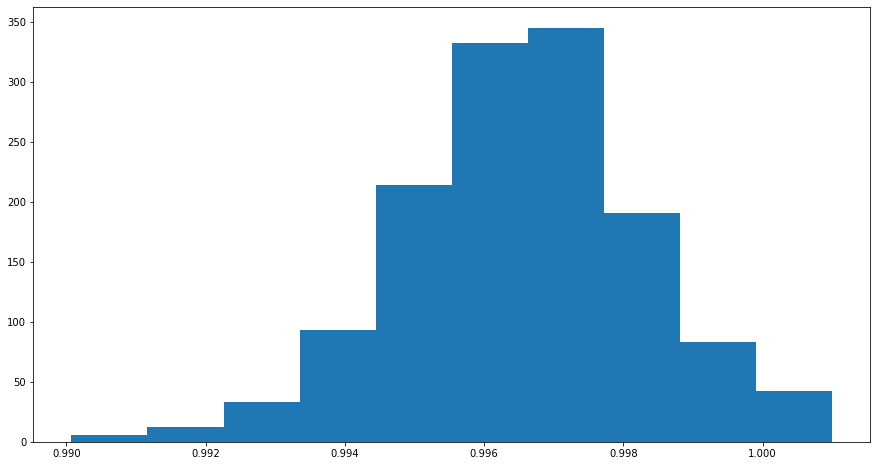

In [347]:
plt.hist(df.density)

<AxesSubplot:xlabel='density', ylabel='Density'>

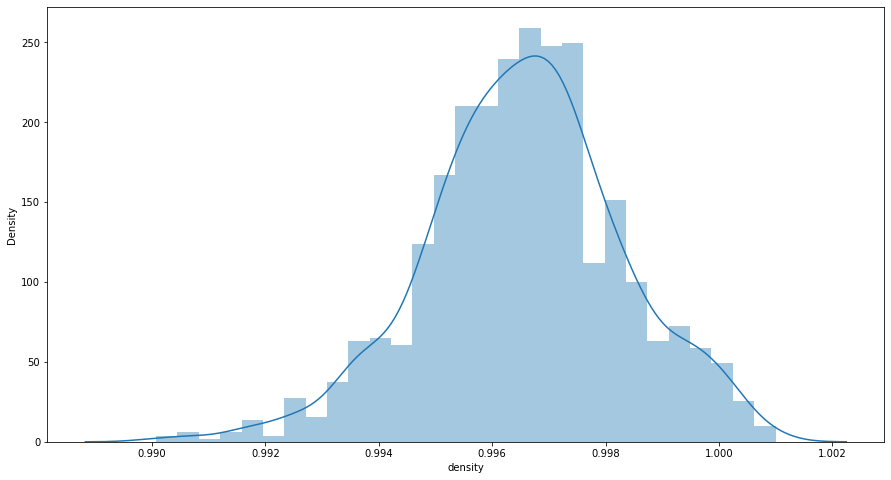

In [348]:
sns.distplot(df.density)

<AxesSubplot:xlabel='density', ylabel='count'>

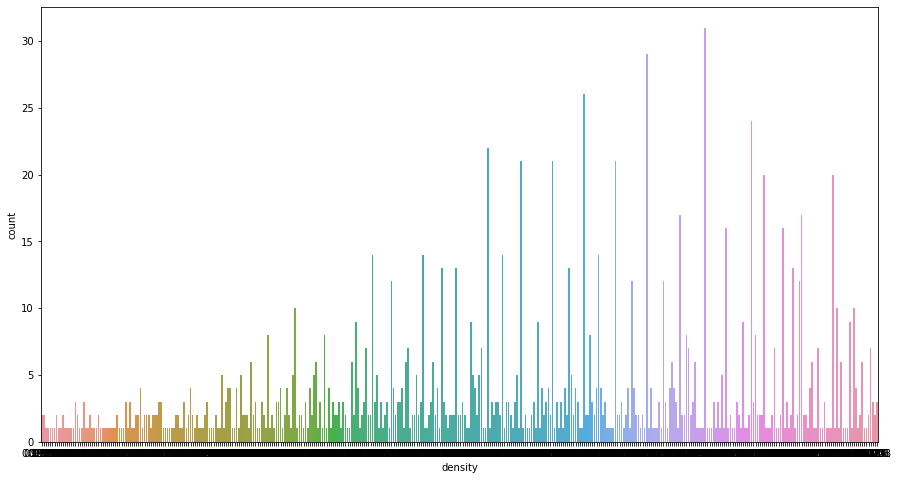

In [349]:
sns.countplot(df.density)

<AxesSubplot:xlabel='density'>

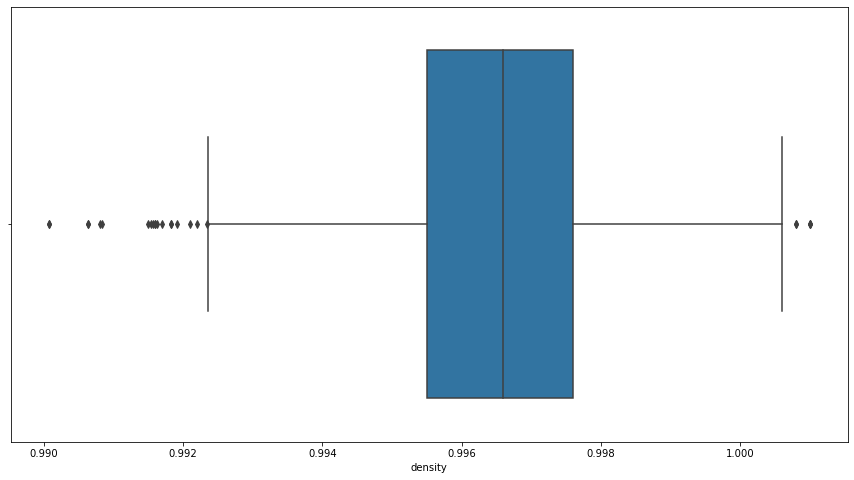

In [350]:
sns.boxplot(df.density)

In [351]:
IQR=df.quantile(0.75)-df.density.quantile(0.25)
IQR

fixed_acidity            8.1045
volatile_acidity        -0.3605
citric_acid             -0.5855
residual_sugar           1.5045
chlorides               -0.9075
free_sulfur_dioxide     19.0045
total_sulfur_dioxide    54.0045
density                  0.0021
pH                       2.4145
sulphates               -0.2755
alcohol                 10.1045
Name: 0.75, dtype: float64

In [352]:
L_limit=df.density.quantile(0.75)-(1.5*IQR)
L_limit

fixed_acidity          -11.15915
volatile_acidity         1.53835
citric_acid              1.87585
residual_sugar          -1.25915
chlorides                2.35885
free_sulfur_dioxide    -27.50915
total_sulfur_dioxide   -80.00915
density                  0.99445
pH                      -2.62415
sulphates                1.41085
alcohol                -14.15915
Name: 0.75, dtype: float64

In [353]:
len(df.density[df.density<0.9944500000000001])

144

In [354]:
df=df[df['density']>=0.991]

In [355]:
df.groupby('quality')['density'].mean()

quality
bad     0.995736
good    0.996704
Name: density, dtype: float64

In [356]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m5=ols('density ~ quality',data=df).fit()
an5=sm.stats.anova_lm(m5)
print(an5)

t5=pairwise_tukeyhsd(df.density,df.quality,alpha=0.05)
print(t5)

              df    sum_sq   mean_sq          F        PR(>F)
quality      1.0  0.000143  0.000143  50.558638  1.873848e-12
Residual  1343.0  0.003807  0.000003        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   bad   good    0.001 0.001 0.0007 0.0012   True
-------------------------------------------------


In [357]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [358]:
df.pH.value_counts()

3.36    53
3.39    47
3.30    47
3.26    46
3.29    42
        ..
3.85     1
2.87     1
2.92     1
3.74     1
3.75     1
Name: pH, Length: 82, dtype: int64

In [359]:
df.pH.describe()

count    1345.000000
mean        3.325316
std         0.148833
min         2.870000
25%         3.220000
50%         3.320000
75%         3.410000
max         4.010000
Name: pH, dtype: float64

(array([ 11.,  51., 253., 370., 383., 189.,  60.,  23.,   1.,   4.]),
 array([2.87 , 2.984, 3.098, 3.212, 3.326, 3.44 , 3.554, 3.668, 3.782,
        3.896, 4.01 ]),
 <BarContainer object of 10 artists>)

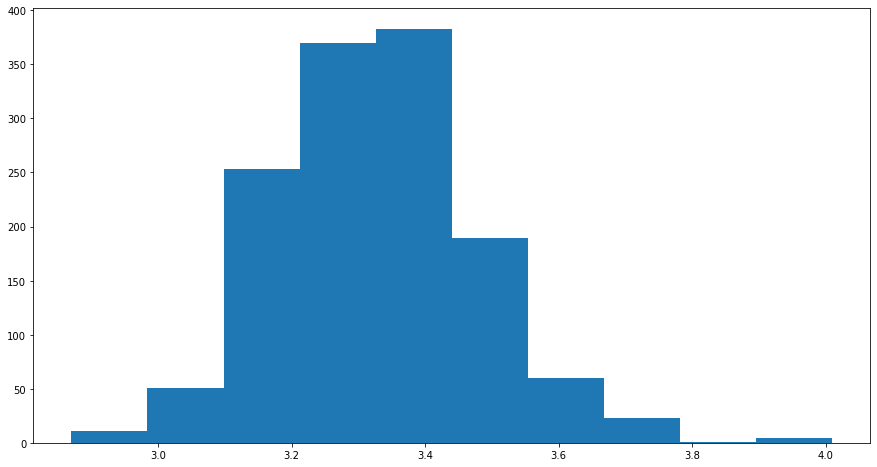

In [360]:
plt.hist(df.pH)

<AxesSubplot:xlabel='pH', ylabel='Density'>

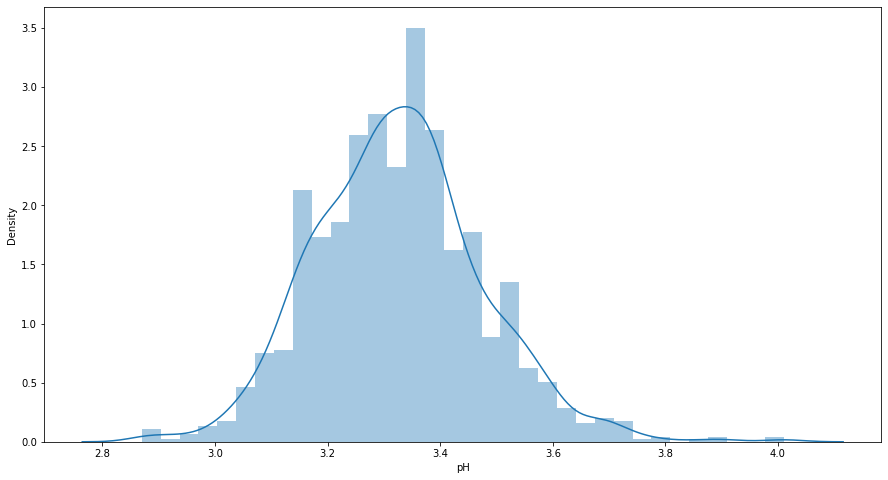

In [361]:
sns.distplot(df.pH)

<AxesSubplot:xlabel='pH'>

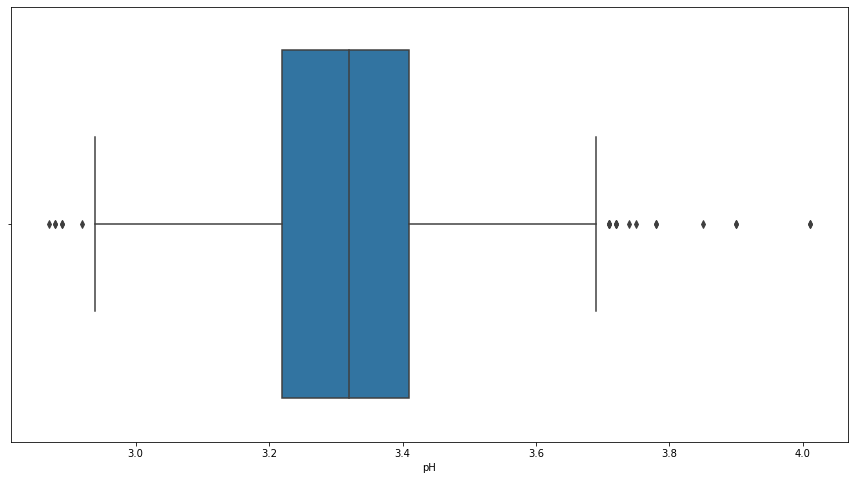

In [362]:
sns.boxplot(df.pH)

In [363]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m5=ols('pH ~ quality',data=df).fit()
an5=sm.stats.anova_lm(m5)
print(an5)

t5=pairwise_tukeyhsd(df.pH,df.quality,alpha=0.05)
print(t5)

              df     sum_sq   mean_sq         F    PR(>F)
quality      1.0   0.111809  0.111809  5.062727  0.024607
Residual  1343.0  29.659682  0.022085       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   bad   good    0.027 0.0246 0.0035 0.0506   True
--------------------------------------------------


In [364]:
IQR=df.pH.quantile(0.75)-df.pH.quantile(0.25)
IQR

0.18999999999999995

In [365]:
upper_limit=df.pH.quantile(0.75)+(1.5*IQR)
upper_limit

3.6950000000000003

In [366]:
len(df.pH[df.pH>3.6950000000000003])

16

In [367]:
df=df[df['pH']<=3.8]

In [368]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [369]:
df.sulphates.value_counts()

0.58    62
0.54    60
0.60    59
0.62    53
0.56    50
        ..
0.33     1
1.16     1
1.01     1
1.00     1
1.10     1
Name: sulphates, Length: 77, dtype: int64

(array([ 43., 406., 499., 255.,  98.,  25.,   9.,   1.,   3.,   1.]),
 array([0.33 , 0.453, 0.576, 0.699, 0.822, 0.945, 1.068, 1.191, 1.314,
        1.437, 1.56 ]),
 <BarContainer object of 10 artists>)

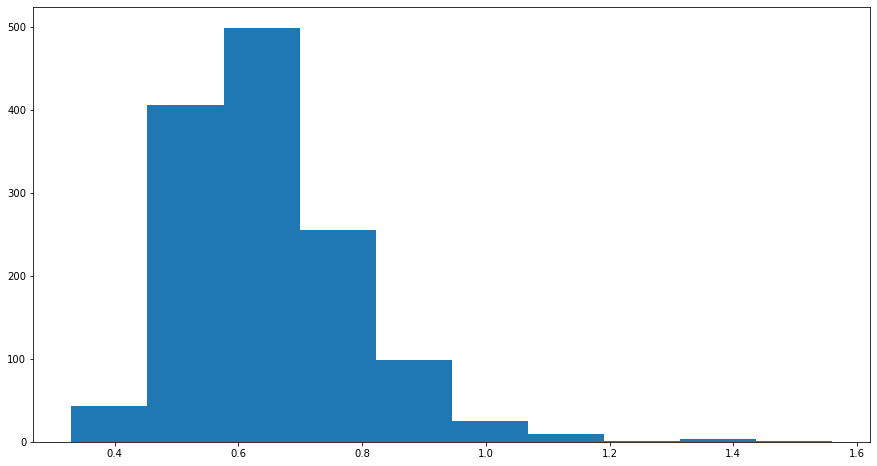

In [370]:
plt.hist(df.sulphates)

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

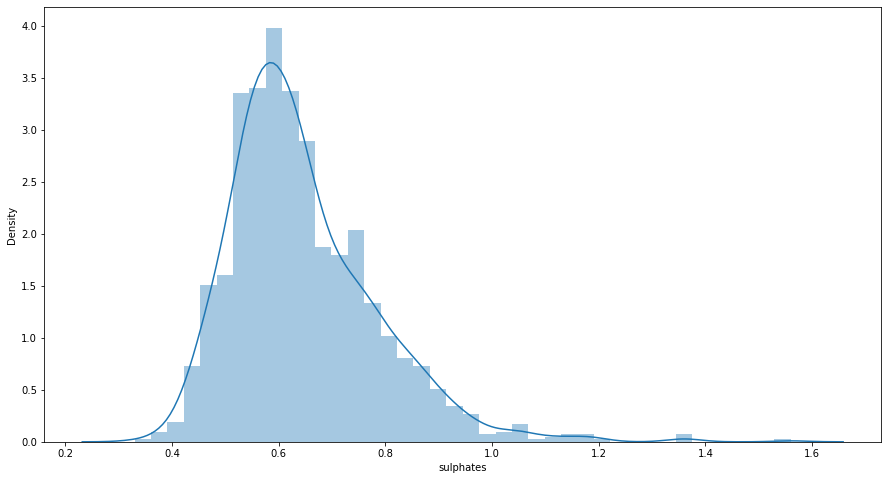

In [371]:
sns.distplot(df.sulphates)

<AxesSubplot:xlabel='sulphates'>

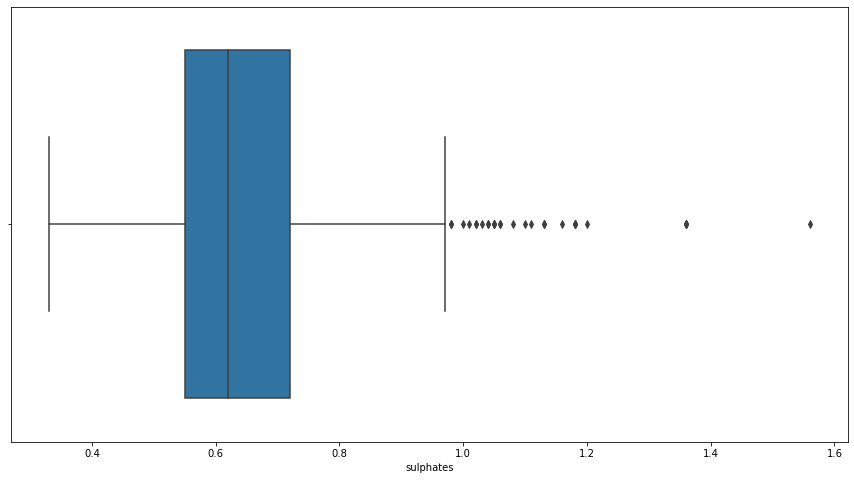

In [372]:
sns.boxplot(df.sulphates)

In [373]:
IQR=df.sulphates.quantile(0.75)-df.sulphates.quantile(0.25)
IQR

0.16999999999999993

In [374]:
upper_limit=df.sulphates.quantile(0.75)+(1.5*IQR)
upper_limit

0.9749999999999999

In [375]:
len(df.sulphates[df.sulphates>0.9749999999999999])

28

In [376]:
df=df[df['sulphates']<=1.0]

In [377]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m5=ols('sulphates ~ quality',data=df).fit()
an5=sm.stats.anova_lm(m5)
print(an5)

t5=pairwise_tukeyhsd(df.sulphates,df.quality,alpha=0.05)
print(t5)

              df     sum_sq   mean_sq          F        PR(>F)
quality      1.0   1.737598  1.737598  133.99258  1.415479e-29
Residual  1313.0  17.026812  0.012968        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   bad   good  -0.1092 0.001 -0.1277 -0.0907   True
---------------------------------------------------


In [378]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [379]:
df.alcohol.value_counts()

9.500000     116
9.800000      74
9.400000      73
10.000000     61
9.600000      53
9.200000      53
10.500000     51
11.000000     51
9.700000      50
9.300000      44
10.100000     44
10.900000     40
10.400000     40
9.900000      37
10.200000     36
10.800000     34
11.300000     31
11.200000     31
11.400000     30
10.300000     27
11.500000     25
10.600000     25
10.700000     24
11.800000     24
11.100000     22
9.000000      20
11.700000     18
9.100000      17
11.900000     17
12.500000     16
12.800000     16
11.600000     12
12.000000     12
12.400000     11
12.100000     11
12.300000     10
12.200000      9
12.900000      7
12.700000      5
14.000000      5
13.000000      4
12.600000      4
13.600000      3
13.300000      2
10.550000      2
8.700000       2
10.033333      2
9.550000       2
9.950000       1
13.566667      1
13.500000      1
8.500000       1
10.750000      1
11.950000      1
13.400000      1
13.100000      1
11.066667      1
13.200000      1
9.050000      

(array([  4., 324., 280., 225., 173., 147.,  84.,  52.,  16.,  10.]),
 array([ 8.4 ,  8.96,  9.52, 10.08, 10.64, 11.2 , 11.76, 12.32, 12.88,
        13.44, 14.  ]),
 <BarContainer object of 10 artists>)

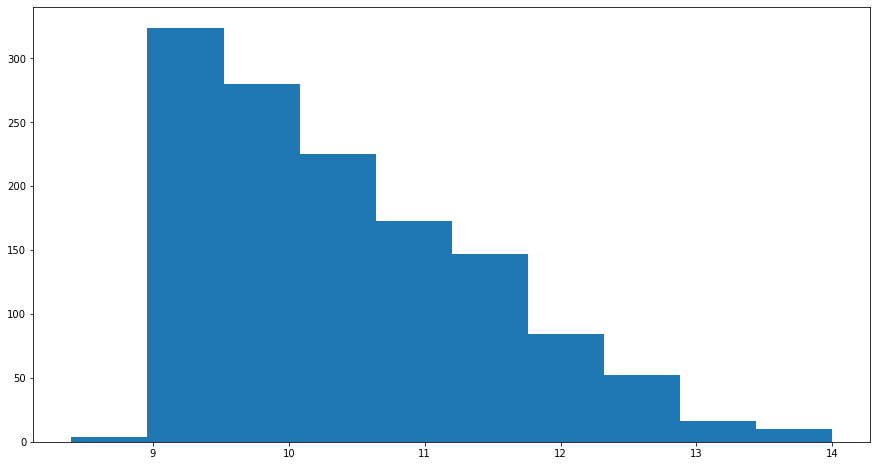

In [380]:
plt.hist(df.alcohol)

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

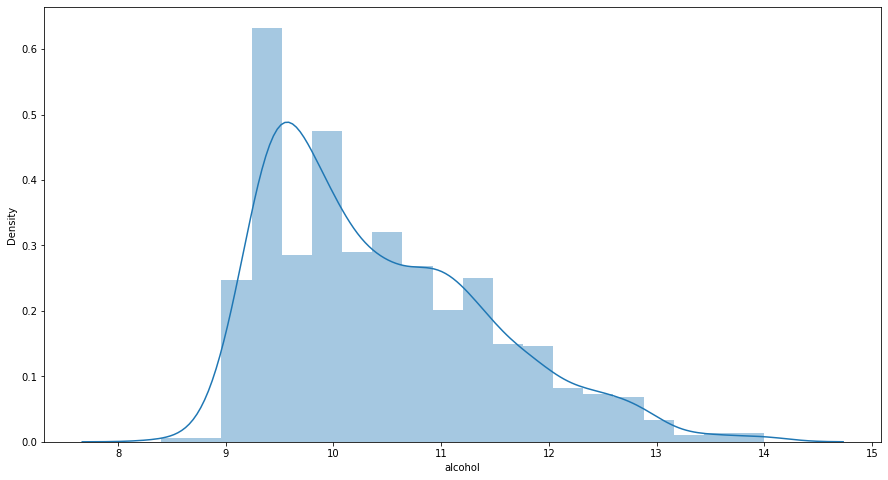

In [381]:
sns.distplot(df.alcohol)

<AxesSubplot:xlabel='alcohol'>

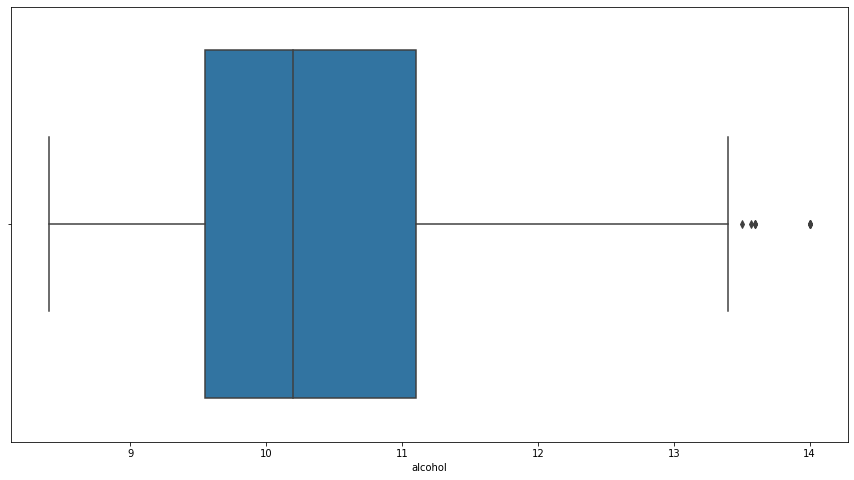

In [382]:
sns.boxplot(df.alcohol)

In [383]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m5=ols('alcohol ~ quality',data=df).fit()
an5=sm.stats.anova_lm(m5)
print(an5)

t5=pairwise_tukeyhsd(df.alcohol,df.quality,alpha=0.05)
print(t5)

              df       sum_sq     mean_sq           F        PR(>F)
quality      1.0   242.728173  242.728173  278.466866  7.592084e-57
Residual  1313.0  1144.488375    0.871659         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
   bad   good  -1.2903 0.001 -1.442 -1.1386   True
--------------------------------------------------


In [384]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good


In [385]:
categorical=df.select_dtypes(include=object)
print(len(categorical.columns))
categorical.columns

1


Index(['quality'], dtype='object')

In [386]:
from sklearn.preprocessing import LabelEncoder
for i in categorical:
    label=LabelEncoder()
    df[i]=label.fit_transform(df[i])

In [387]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


# MACHNIE LEARNING MODELS

In [388]:
# logistic regeression

In [389]:
x = df.loc[:, df.columns != 'quality']
y = df.loc[:, df.columns == 'quality']

In [390]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver= 'sag')
logreg.fit(x_train, y_train)


LogisticRegression(solver='sag')

In [392]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.88


In [406]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0  47]
 [  0 348]]


In [407]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.88      1.00      0.94       348

    accuracy                           0.88       395
   macro avg       0.44      0.50      0.47       395
weighted avg       0.78      0.88      0.83       395



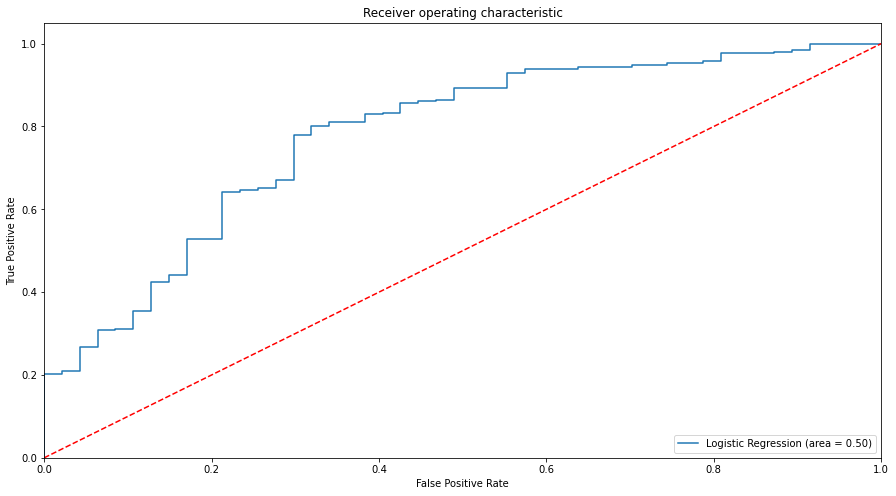

In [408]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [409]:
# decission tree

In [410]:

from sklearn import tree
from sklearn.metrics import mean_squared_error

In [411]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=40)
tree.fit(x_train,y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [412]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2)) 
print(round(accuracy_score(y_test,y_test_pred), 2))


1.0
0.92


In [413]:
path = tree.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00072258, 0.00098814, 0.00099379, 0.0010628 ,
       0.00107759, 0.00108696, 0.0013468 , 0.00144928, 0.0015528 ,
       0.00158103, 0.00163043, 0.00163043, 0.00163043, 0.00163043,
       0.00163043, 0.00171899, 0.00179348, 0.00181159, 0.00181159,
       0.00182228, 0.00186335, 0.00186335, 0.00187504, 0.00193237,
       0.00202899, 0.00214097, 0.00226106, 0.00232919, 0.00241546,
       0.0024284 , 0.00293428, 0.0030499 , 0.00325914, 0.00349584,
       0.00400887, 0.00437383, 0.00442735, 0.00485979, 0.00513153,
       0.01178491, 0.01722509, 0.03228122])

In [414]:
accuracy_train, accuracy_test = [],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(x_train, y_train)
    y_train_pred=tree.predict(x_train)
    y_test_pred=tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    

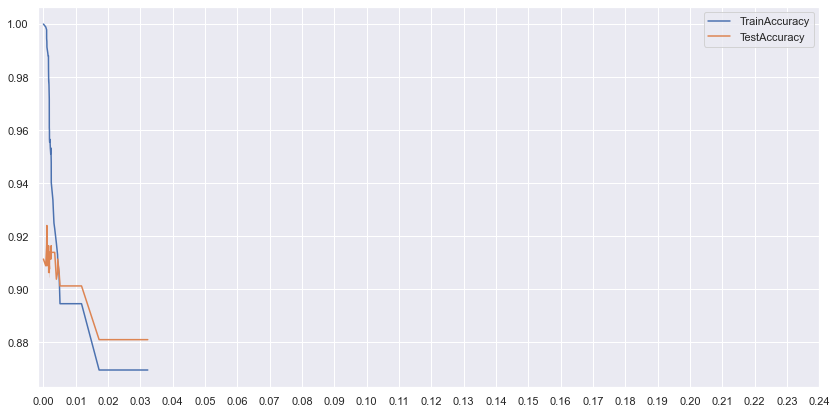

In [415]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train, x = alphas, label = 'TrainAccuracy')
sns.lineplot(y=accuracy_test, x = alphas, label = 'TestAccuracy')
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [419]:
tree = DecisionTreeClassifier(ccp_alpha=0.001,random_state=40)
tree.fit(x_train,y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2)) 
print(round(accuracy_score(y_test,y_test_pred), 2)) 



0.99
0.93


In [420]:
# random forest classifier

In [421]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [425]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
y_pred3 = clf.predict(x_test)
y_test_pred3 = clf.predict(x_test)


In [426]:
from sklearn.metrics import accuracy_score


print(round(accuracy_score(y_test,y_test_pred3), 2))

0.92


In [427]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3 )
print(confusion_matrix)

[[ 24  23]
 [  7 341]]


In [428]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.77      0.51      0.62        47
           1       0.94      0.98      0.96       348

    accuracy                           0.92       395
   macro avg       0.86      0.75      0.79       395
weighted avg       0.92      0.92      0.92       395



In [430]:
# XG boost classifier

In [442]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
import xgboost as xgb


In [445]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(x_train, y_train)
train_model2 = model2.fit(x_train, y_train)

[16:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [448]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(x_test)
pred2 = train_model2.predict(x_test)

print((classification_report(y_test, pred1)))
print((classification_report(y_test, pred2)))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72        47
           1       0.95      0.99      0.97       348

    accuracy                           0.94       395
   macro avg       0.90      0.80      0.84       395
weighted avg       0.94      0.94      0.94       395

              precision    recall  f1-score   support

           0       0.80      0.60      0.68        47
           1       0.95      0.98      0.96       348

    accuracy                           0.93       395
   macro avg       0.87      0.79      0.82       395
weighted avg       0.93      0.93      0.93       395



In [447]:
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))

Accuracy for model 1: 94.18
Accuracy for model 2: 93.42


In [ ]:
# KNN

